In [1]:
import pandas as pd
import numpy as np

import sys
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

import tensorflow as tf

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:

Features = pd.read_csv('./features_dataset.csv')
Features.head()
# Features.shape

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,152,153,154,155,156,157,158,159,160,labels
0,0,0.272267,0.689451,0.708028,0.666473,0.715468,0.694820,0.627661,0.632560,0.687715,...,0.000687,0.000502,0.000372,0.000197,0.000137,0.000288,0.000349,0.000143,1.498768e-05,angry
1,1,0.262035,0.603476,0.668302,0.692199,0.709884,0.658301,0.605176,0.609343,0.640842,...,0.000009,0.000012,0.000028,0.000034,0.000036,0.000035,0.000032,0.000011,8.432723e-07,calm
2,2,0.195466,0.628032,0.687169,0.651985,0.621273,0.604192,0.640623,0.626136,0.652430,...,0.000086,0.000107,0.000061,0.000052,0.000059,0.000095,0.000090,0.000031,2.326331e-06,sad
3,3,0.173769,0.720864,0.685492,0.655122,0.652557,0.587786,0.550012,0.638170,0.707171,...,0.000064,0.000051,0.000074,0.000129,0.000198,0.000243,0.000190,0.000074,4.691918e-06,fear
4,4,0.207284,0.692981,0.737456,0.726056,0.685032,0.636497,0.568223,0.528898,0.598124,...,0.000018,0.000014,0.000014,0.000005,0.000007,0.000011,0.000016,0.000008,4.218449e-07,sad


In [3]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd

In [4]:
from sklearn.utils import shuffle
temp = shuffle(Features)
# temp[:10]


df = np.random.rand(len(temp)) < 0.8
train = temp[df]
test = temp[~df]


trainfeatures = train.iloc[:, :-1]
trainlabel = train.iloc[:, -1:]
testfeatures = test.iloc[:, :-1]
testlabel = test.iloc[:, -1:]


from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [5]:
# making our data compatible to model.
x_train = np.expand_dims(X_train, axis=2)
x_test = np.expand_dims(X_test, axis=2)

In [6]:
print('Train dimension:')
print(x_train.shape)
print('Test dimension:')
print(x_test.shape)

print('Train labels dimension:')
print(y_train.shape)
print('Test labels dimension:')
print(y_test.shape)

Train dimension:
(1157, 162, 1)
Test dimension:
(283, 162, 1)
Train labels dimension:
(1157, 8)
Test labels dimension:
(283, 8)


In [7]:
# LSTM Classifier
import keras
from keras.models import Sequential
from keras.layers import *
from keras.regularizers import l2, l1, l1_l2

from tensorflow.keras import layers,regularizers,models
from tensorflow import keras

In [8]:
model = Sequential()
model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(256, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(LSTM(128, return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)))
model.add(BatchNormalization())
model.add(Flatten())

# model.add(Dense(32))
# model.add(Dropout(0.4))
# model.add(Activation('relu'))

model.add(Dense(8))
model.add(Activation('softmax'))


# model = Sequential()
# model.add(BatchNormalization(axis=-1, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(64, return_sequences=True))
# model.add(Dropout(0.2))
# model.add(LSTM(32, return_sequences=True))
# model.add(BatchNormalization())
# model.add(Flatten())

# model.add(Dense(32))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('softmax'))


# model = models.Sequential([
#         layers.BatchNormalization(input_shape=(x_train.shape[1], 1)),
#         layers.LSTM(256,dropout=0.2,recurrent_dropout=0.2,activation=None,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(128,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.LSTM(32,dropout=0.2,recurrent_dropout=0.2,return_sequences=True,activation=None,kernel_regularizer=regularizers.l2(1e-5)),
#         layers.BatchNormalization(),

#         layers.Flatten(),
#         layers.Dense(256,activation='relu',kernel_regularizer=regularizers.l2(1e-5)),
#         layers.Dropout(0.2),
#         layers.BatchNormalization(),
#         layers.Dense(8,activation='softmax'),
# ])

# opt = keras.optimizers.Adam(learning_rate=0.001)
# Configures the model for training
model.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 162, 1)            4         
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 162, 256)          264192    
                                                                 
 lstm_1 (LSTM)               (None, 162, 256)          525312    
                                                                 
 lstm_2 (LSTM)               (None, 162, 128)          197120    
                                                                 
 batch_normalization_1 (Bat  (None, 162, 128)          512       
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 20736)            

In [9]:
# Training the model
history=model.fit(x_train, y_train, batch_size=256, epochs=500, validation_data=(x_test, y_test), shuffle=True)

Epoch 1/500


5/5 [==============================] - 14s 2s/step - loss: 5.7400 - accuracy: 0.1245 - val_loss: 2.0701 - val_accuracy: 0.1555
Epoch 2/500
5/5 [==============================] - 9s 2s/step - loss: 2.9427 - accuracy: 0.1417 - val_loss: 2.0739 - val_accuracy: 0.2085
Epoch 3/500
5/5 [==============================] - 9s 2s/step - loss: 2.0265 - accuracy: 0.1997 - val_loss: 2.0751 - val_accuracy: 0.1449
Epoch 4/500
5/5 [==============================] - 9s 2s/step - loss: 2.0380 - accuracy: 0.1720 - val_loss: 2.0703 - val_accuracy: 0.1449
Epoch 5/500
5/5 [==============================] - 9s 2s/step - loss: 1.9937 - accuracy: 0.2014 - val_loss: 2.0670 - val_accuracy: 0.1449
Epoch 6/500
5/5 [==============================] - 9s 2s/step - loss: 2.0135 - accuracy: 0.2014 - val_loss: 2.0737 - val_accuracy: 0.2544
Epoch 7/500
5/5 [==============================] - 9s 2s/step - loss: 2.0161 - accuracy: 0.2135 - val_loss: 2.0715 - val_accuracy: 0.1873
Epoch 8/500
5/5 [==============

Epoch 57/500
5/5 [==============================] - 10s 2s/step - loss: 1.7062 - accuracy: 0.3405 - val_loss: 2.2899 - val_accuracy: 0.0601
Epoch 58/500
5/5 [==============================] - 10s 2s/step - loss: 1.7841 - accuracy: 0.2878 - val_loss: 1.9905 - val_accuracy: 0.2191
Epoch 59/500
5/5 [==============================] - 10s 2s/step - loss: 1.6901 - accuracy: 0.3354 - val_loss: 2.2885 - val_accuracy: 0.1696
Epoch 60/500
5/5 [==============================] - 10s 2s/step - loss: 1.7282 - accuracy: 0.3362 - val_loss: 2.1501 - val_accuracy: 0.1908
Epoch 61/500
5/5 [==============================] - 10s 2s/step - loss: 1.6984 - accuracy: 0.3319 - val_loss: 2.0316 - val_accuracy: 0.2120
Epoch 62/500
5/5 [==============================] - 10s 2s/step - loss: 1.7095 - accuracy: 0.3414 - val_loss: 2.0137 - val_accuracy: 0.1979
Epoch 63/500
5/5 [==============================] - 10s 2s/step - loss: 1.7342 - accuracy: 0.3241 - val_loss: 2.0625 - val_accuracy: 0.2226
Epoch 64/500
5/5 [==

5/5 [==============================] - 9s 2s/step - loss: 1.6478 - accuracy: 0.3613 - val_loss: 2.3012 - val_accuracy: 0.2085
Epoch 116/500
5/5 [==============================] - 9s 2s/step - loss: 1.6307 - accuracy: 0.3760 - val_loss: 4.1723 - val_accuracy: 0.2120
Epoch 117/500
5/5 [==============================] - 9s 2s/step - loss: 1.6039 - accuracy: 0.3993 - val_loss: 3.9054 - val_accuracy: 0.1661
Epoch 118/500
5/5 [==============================] - 9s 2s/step - loss: 1.6126 - accuracy: 0.3803 - val_loss: 1.7599 - val_accuracy: 0.2686
Epoch 119/500
5/5 [==============================] - 9s 2s/step - loss: 1.6170 - accuracy: 0.3898 - val_loss: 2.8003 - val_accuracy: 0.1449
Epoch 120/500
5/5 [==============================] - 9s 2s/step - loss: 1.6084 - accuracy: 0.3725 - val_loss: 1.8949 - val_accuracy: 0.2473
Epoch 121/500
5/5 [==============================] - 9s 2s/step - loss: 1.6213 - accuracy: 0.3682 - val_loss: 3.1747 - val_accuracy: 0.1767
Epoch 122/500
5/5 [===============

5/5 [==============================] - 12s 2s/step - loss: 1.5471 - accuracy: 0.4097 - val_loss: 1.9370 - val_accuracy: 0.3074
Epoch 174/500
5/5 [==============================] - 10s 2s/step - loss: 1.5700 - accuracy: 0.4010 - val_loss: 4.5125 - val_accuracy: 0.2120
Epoch 175/500
5/5 [==============================] - 10s 2s/step - loss: 1.5591 - accuracy: 0.4123 - val_loss: 2.5706 - val_accuracy: 0.2226
Epoch 176/500
5/5 [==============================] - 11s 2s/step - loss: 1.5612 - accuracy: 0.4080 - val_loss: 2.4663 - val_accuracy: 0.2792
Epoch 177/500
5/5 [==============================] - 11s 2s/step - loss: 1.5622 - accuracy: 0.3959 - val_loss: 1.8289 - val_accuracy: 0.3216
Epoch 178/500
5/5 [==============================] - 11s 2s/step - loss: 1.5525 - accuracy: 0.4045 - val_loss: 5.1689 - val_accuracy: 0.1413
Epoch 179/500
5/5 [==============================] - 11s 2s/step - loss: 1.5696 - accuracy: 0.4062 - val_loss: 2.4252 - val_accuracy: 0.2297
Epoch 180/500
5/5 [========

5/5 [==============================] - 9s 2s/step - loss: 1.4965 - accuracy: 0.4451 - val_loss: 5.3917 - val_accuracy: 0.2085
Epoch 232/500
5/5 [==============================] - 9s 2s/step - loss: 1.5029 - accuracy: 0.4226 - val_loss: 2.1625 - val_accuracy: 0.2827
Epoch 233/500
5/5 [==============================] - 9s 2s/step - loss: 1.4563 - accuracy: 0.4589 - val_loss: 3.0532 - val_accuracy: 0.2261
Epoch 234/500
5/5 [==============================] - 9s 2s/step - loss: 1.4999 - accuracy: 0.4304 - val_loss: 1.8768 - val_accuracy: 0.2756
Epoch 235/500
5/5 [==============================] - 9s 2s/step - loss: 1.4575 - accuracy: 0.4451 - val_loss: 2.2763 - val_accuracy: 0.2721
Epoch 236/500
5/5 [==============================] - 9s 2s/step - loss: 1.5198 - accuracy: 0.4278 - val_loss: 4.0442 - val_accuracy: 0.2085
Epoch 237/500
5/5 [==============================] - 9s 2s/step - loss: 1.4891 - accuracy: 0.4261 - val_loss: 2.0997 - val_accuracy: 0.2968
Epoch 238/500
5/5 [===============

5/5 [==============================] - 9s 2s/step - loss: 1.3973 - accuracy: 0.4780 - val_loss: 5.6807 - val_accuracy: 0.1307
Epoch 290/500
5/5 [==============================] - 9s 2s/step - loss: 1.3734 - accuracy: 0.4736 - val_loss: 2.0922 - val_accuracy: 0.3145
Epoch 291/500
5/5 [==============================] - 9s 2s/step - loss: 1.3750 - accuracy: 0.4849 - val_loss: 2.6308 - val_accuracy: 0.2615
Epoch 292/500
5/5 [==============================] - 9s 2s/step - loss: 1.3618 - accuracy: 0.4909 - val_loss: 3.0721 - val_accuracy: 0.2297
Epoch 293/500
5/5 [==============================] - 9s 2s/step - loss: 1.3755 - accuracy: 0.4909 - val_loss: 2.1379 - val_accuracy: 0.3145
Epoch 294/500
5/5 [==============================] - 9s 2s/step - loss: 1.4133 - accuracy: 0.4736 - val_loss: 2.6309 - val_accuracy: 0.2226
Epoch 295/500
5/5 [==============================] - 9s 2s/step - loss: 1.3647 - accuracy: 0.4840 - val_loss: 2.0592 - val_accuracy: 0.3286
Epoch 296/500
5/5 [===============

5/5 [==============================] - 9s 2s/step - loss: 1.2971 - accuracy: 0.5134 - val_loss: 5.9455 - val_accuracy: 0.1378
Epoch 348/500
5/5 [==============================] - 9s 2s/step - loss: 1.2736 - accuracy: 0.5220 - val_loss: 2.8693 - val_accuracy: 0.2827
Epoch 349/500
5/5 [==============================] - 9s 2s/step - loss: 1.3119 - accuracy: 0.5134 - val_loss: 2.2320 - val_accuracy: 0.3216
Epoch 350/500
5/5 [==============================] - 9s 2s/step - loss: 1.2858 - accuracy: 0.5272 - val_loss: 1.5958 - val_accuracy: 0.4028
Epoch 351/500
5/5 [==============================] - 9s 2s/step - loss: 1.2888 - accuracy: 0.5203 - val_loss: 2.7080 - val_accuracy: 0.2544
Epoch 352/500
5/5 [==============================] - 9s 2s/step - loss: 1.2827 - accuracy: 0.5177 - val_loss: 4.7620 - val_accuracy: 0.2297
Epoch 353/500
5/5 [==============================] - 9s 2s/step - loss: 1.3092 - accuracy: 0.5117 - val_loss: 8.5164 - val_accuracy: 0.1201
Epoch 354/500
5/5 [===============

5/5 [==============================] - 9s 2s/step - loss: 1.2417 - accuracy: 0.5376 - val_loss: 2.3016 - val_accuracy: 0.3357
Epoch 406/500
5/5 [==============================] - 9s 2s/step - loss: 1.2591 - accuracy: 0.5220 - val_loss: 2.0866 - val_accuracy: 0.3675
Epoch 407/500
5/5 [==============================] - 9s 2s/step - loss: 1.2537 - accuracy: 0.5246 - val_loss: 1.5600 - val_accuracy: 0.4311
Epoch 408/500
5/5 [==============================] - 10s 2s/step - loss: 1.2312 - accuracy: 0.5350 - val_loss: 3.5553 - val_accuracy: 0.2686
Epoch 409/500
5/5 [==============================] - 10s 2s/step - loss: 1.1959 - accuracy: 0.5661 - val_loss: 2.4297 - val_accuracy: 0.2933
Epoch 410/500
5/5 [==============================] - 9s 2s/step - loss: 1.2575 - accuracy: 0.5411 - val_loss: 9.5574 - val_accuracy: 0.0883
Epoch 411/500
5/5 [==============================] - 9s 2s/step - loss: 1.2101 - accuracy: 0.5627 - val_loss: 2.4797 - val_accuracy: 0.2721
Epoch 412/500
5/5 [=============

5/5 [==============================] - 11s 2s/step - loss: 1.1828 - accuracy: 0.5532 - val_loss: 4.2006 - val_accuracy: 0.3180
Epoch 464/500
5/5 [==============================] - 13s 3s/step - loss: 1.2108 - accuracy: 0.5385 - val_loss: 2.7860 - val_accuracy: 0.2968
Epoch 465/500
5/5 [==============================] - 13s 3s/step - loss: 1.1658 - accuracy: 0.5627 - val_loss: 1.7990 - val_accuracy: 0.4028
Epoch 466/500
5/5 [==============================] - 13s 3s/step - loss: 1.2139 - accuracy: 0.5497 - val_loss: 1.7595 - val_accuracy: 0.4170
Epoch 467/500
5/5 [==============================] - 11s 2s/step - loss: 1.1653 - accuracy: 0.5791 - val_loss: 1.9391 - val_accuracy: 0.3675
Epoch 468/500
5/5 [==============================] - 10s 2s/step - loss: 1.2011 - accuracy: 0.5480 - val_loss: 1.7066 - val_accuracy: 0.4311
Epoch 469/500
5/5 [==============================] - 12s 2s/step - loss: 1.1983 - accuracy: 0.5532 - val_loss: 1.7971 - val_accuracy: 0.4064
Epoch 470/500
5/5 [========

9/9 [==============================] - 1s 106ms/step - loss: 2.2682 - accuracy: 0.3993
Accuracy of our model on test data :  39.92932736873627 %


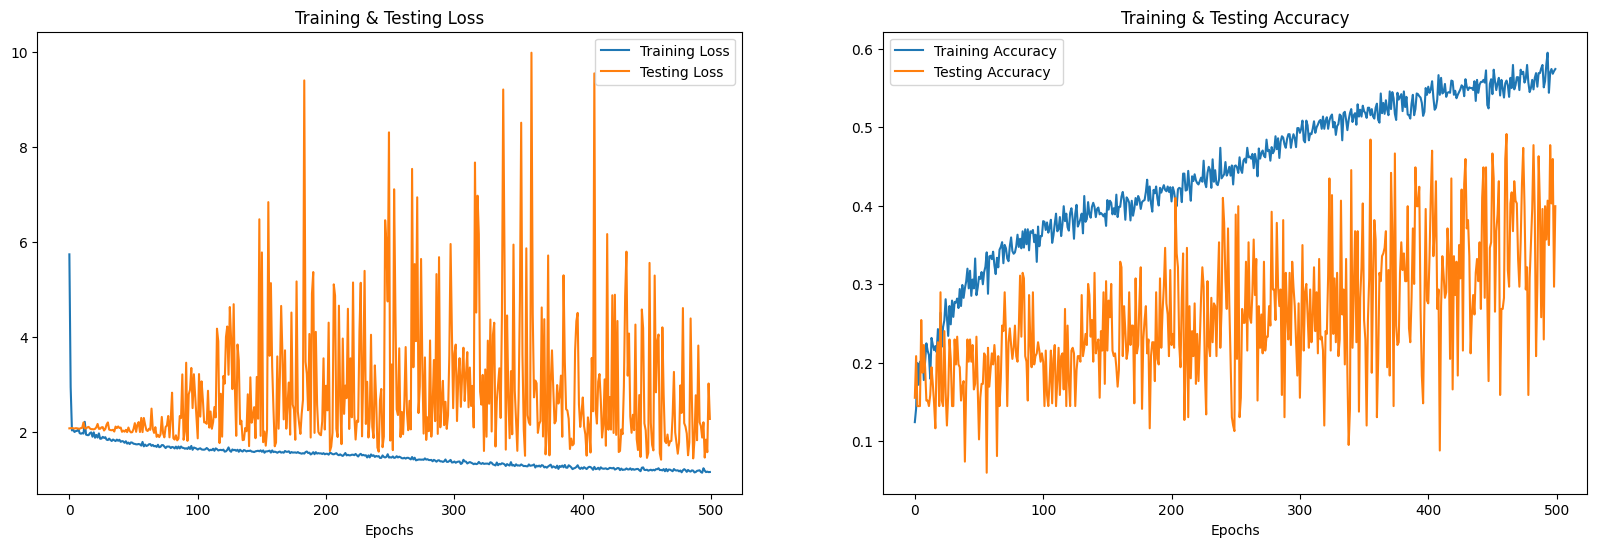

In [11]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(500)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [ ]:
model.save('LSTM_model.h5')